In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

# Introduction to QuTiP (Quantum Toolkit in Python)

$\textbf{Author: Bharath Kannan}$

We will begin by introducing the basics of the QuTiP python package. From the QuTiP documentation:

"QuTiP is a python package for calculations and numerical simulations of quantum systems.

It includes facilities for representing and doing calculations with quantum objects such state vectors (wavefunctions), as bras/kets/density matrices, quantum operators of single and composite systems, and superoperators (useful for defining master equations).

It also includes solvers for a time-evolution of quantum systems, according to: Schrodinger equation, von Neuman equation, master equations, Floquet formalism, Monte-Carlo quantum trajectors, experimental implementations of the stochastic Schrodinger/master equations."

This tutorial is by no means a comprehensive introduction to QuTiP, and we will only use QuTiP to solve one of the equations that are listed above: the Schrodinger equation. Nonetheless, the purpose of this tutorial is to introduce the basics of the package so that you can continue to explore and learn about quantum mechanics on your own.

## Quantum object class: qobj
The central structure of the QuTiP package is the Qobj class. This class is used to represent all quantum objects, such as quantum states $|\psi\rangle$ and operators $\hat{O}$. At it's core, the Qobj is simply a container for the vector and matrix representations for these objects, with a few additional convenience attributes.

A Qobj can be created using the constructor Qobj()

In [2]:
q = Qobj([[1], [0]]) # Use the Qobj constructor to define a quantum state that is represented by the vector (1, 0)
q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

As stated before, the Qobj() contains the vector representation of a state, as well as some other information such as the dimensions and shape of the object (2x1 vector in this case), and whether the type of the object is a ket $|\psi\rangle$, a bra $\langle\psi|$, or an operator $\hat{O}$.

## Quantum State Vectors


The first task is to learn how to define a quantum state $|\psi\rangle$. We could just input vectors into the Qobj() constructor, as done above, but there are other functions that make this easier to do.

In our case, we would like to define quantum states that describe the an electron spin as a two-level-system (TLS). 

In [3]:
N = 2 #This defines how many levels we want our quantum states to have. In our case, this is 2.

Let's start by creating the state $|\psi\rangle = |\uparrow\rangle$. For this, we will need to use the "basis(N,i)" function in qutip.

In [4]:
psi_up = basis(N,0)

The second arguement determines whether $|\psi\rangle$ is $|\uparrow\rangle$ or $|\downarrow\rangle$. In qutip's convention, $|i=0\rangle$ will give us $|\uparrow\rangle$ and $|i=1\rangle$ will give us $|\downarrow\rangle$. We can confirm this by printing what vector $|\psi\rangle$ represents. 

In [5]:
psi_up

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

Thus, we have initialzied $|\psi\rangle$ into the state we wanted. Similarly, we can create the state $|\downarrow\rangle$. 

$\textbf{Exercise:}$ Using the above example, define the variable 'psi_down' using the basis() function:

In [6]:
psi_down = # fill in
psi_down

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

Sometimes, it easier to figure out what a state is by drawing it on the Bloch Sphere. QuTiP has some handy functions that can draw an input state:

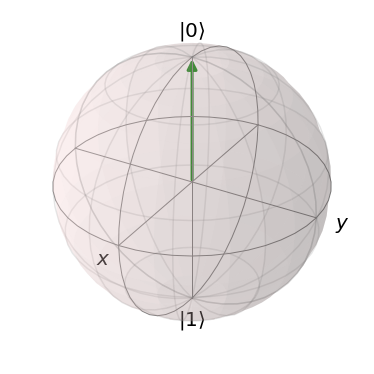

In [7]:
b = Bloch()
b.add_states(psi_up)
b.show()

As desired, we get the state which points up on the Bloch Sphere. We can do the same for $|\downarrow\rangle$.

$\textbf{Exercise:}$ Use the example above to and plot 'psi_down':

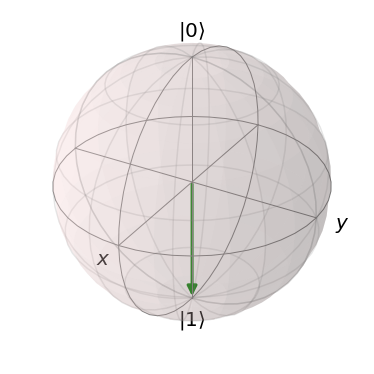

In [8]:
# fill in




In quantum mechanics, we typically deal with superpositions of states. Let's take a look at what an equal superposition of the $|\uparrow\rangle$ and $|\downarrow\rangle$ states looks like on the Bloch sphere.

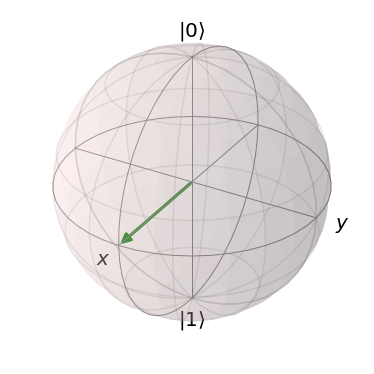

In [9]:
psi_x_positive = (psi_up + psi_down)/np.sqrt(2) # the sqrt(2) here is to make sure we normalize the state. 
b = Bloch()
b.add_states(psi_x_positive)
b.show()

We can see that this state now points to the positive side of the x-axis (we will call this state $|\rightarrow\rangle$). This is the same as what we saw during lecture. 

We can also look at the vector representation of this state:

In [10]:
psi_x_positive

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

Which is exactly we would expect when adding the two vectors ([1,0] + [0,1])/$\sqrt{2}$

$\textbf{Exercise:}$ Try to find the appropriate superpositons of $|\uparrow\rangle$ and $|\downarrow\rangle$ to get the state vector to point towards the negative x-axis, and the positive and negative sides of the y-axis. Use the plotting functions to plot each vector. (Hint: the coefficients in front of $|\downarrow\rangle$ might need to be imaginary, and don't forget about normalziation)

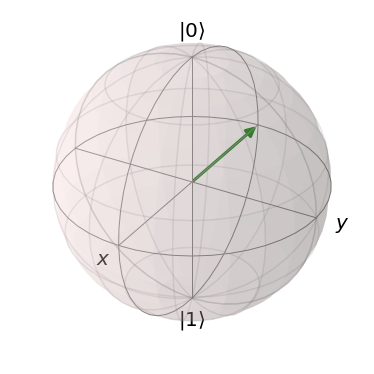

In [11]:
psi_x_negative = # fill in
b = Bloch()
b.add_states(psi_x_negative)
b.show()

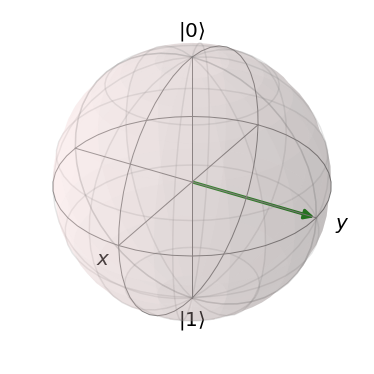

In [12]:
psi_y_positive = # fill in
b = Bloch()
b.add_states(psi_y_positive)
b.show()

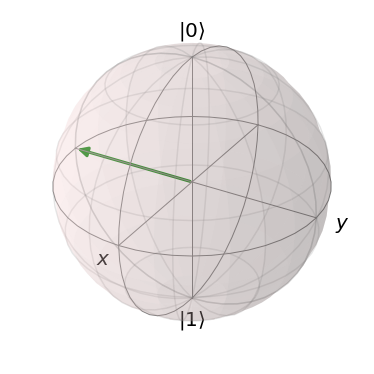

In [13]:
psi_y_negative = # fill in
b = Bloch()
b.add_states(psi_y_negative)
b.show()

We can define the quantum state of a TLS to point anywhere along the Bloch sphere by defining two angles: $\theta$ and $\phi$. The state is defined as $| \psi( \theta, \phi)\rangle$ = $cos ( \theta/2) | \uparrow \rangle$ + $e^{i \phi} sin ( \theta/2) |\downarrow\rangle$. Here, $\theta \in [0,\pi]$ is the azimuthal angle from the z-axis and $\phi\in[0,2\pi]$ is the polar angle in the xy-plane (see https://en.wikipedia.org/wiki/Bloch_sphere for an example image).

$\textbf{Exercise:}$ Compete the function below that generates the state defined by $\theta$ and $\phi$

In [14]:
def psi(theta,phi):
    # fill in
    return # fill in

$\textbf{Exercise:}$ Find the $\theta$ and $\phi$ that point the state vector along the 6 poles of the Bloch sphere ($\pm z, \pm x, \pm y$). Plot the results on the Bloch Sphere for each case.

$+z$:

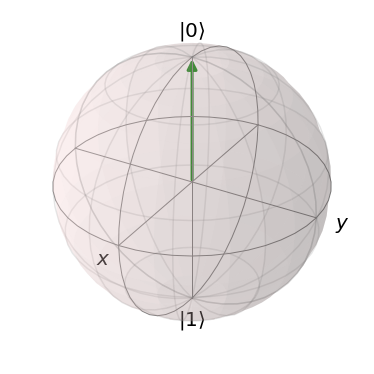

In [15]:
psi_z_positive = # fill in using function psi(theta,phi)
b = Bloch()
b.add_states(psi_z_positive)
b.show()

$-z$:

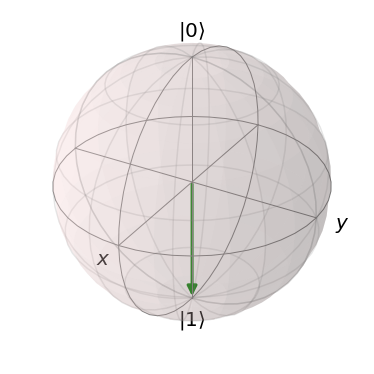

In [16]:
psi_z_negative = # fill in using function psi(theta,phi)
b = Bloch()
b.add_states(psi_z_negative)
b.show()

$+x$:

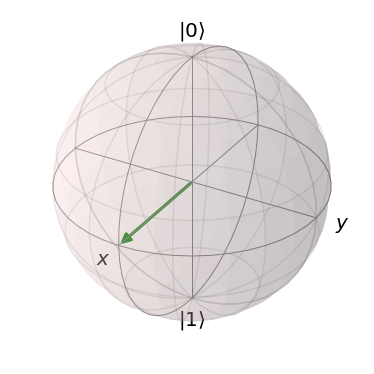

In [17]:
psi_x_positive = # fill in using function psi(theta,phi)
b = Bloch()
b.add_states(psi_x_positive)
b.show()

$-x$:

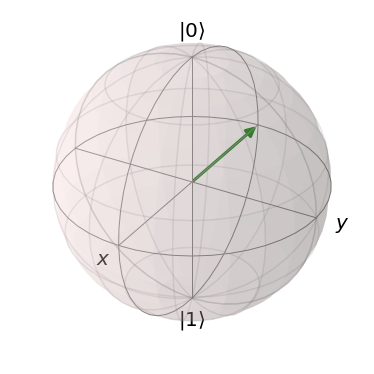

In [18]:
psi_x_negative = # fill in using function psi(theta,phi)
b = Bloch()
b.add_states(psi_x_negative)
b.show()

$+y$:

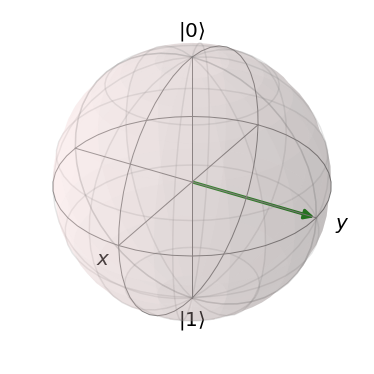

In [19]:
psi_y_positive = # fill in using function psi(theta,phi)
b = Bloch()
b.add_states(psi_y_positive)
b.show()

$-y$:

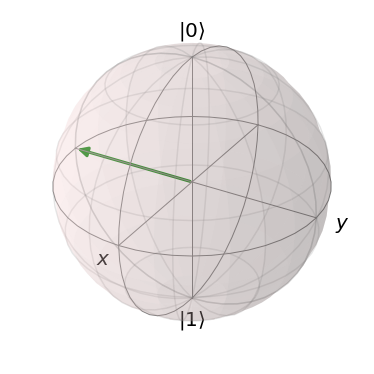

In [20]:
psi_y_negative = # fill in using function psi(theta,phi)
b = Bloch()
b.add_states(psi_y_negative)
b.show()

## Quantum Operators (Matrices)

Now that we have learned how to represent arbitrary states on the Bloch Sphere, we can now learn how quantum operators, represented as matrices, are defined in QuTiP.

Operators in QuTiP are also instances of the same Qobj() class used to define states $|\psi\rangle$. However, the dimensions of the data in the QobJ will now be an $N \times N$ square matrix. For example, we could create the identity operator as follows:

In [21]:
I = Qobj([[1,0],[0,1]])
I

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

Defining operators on an element-wise basis can get a bit annoying and repetitive. Luckily for us, QuTiP has many built-in functions to generate the most commonly used operators. For example, we can use the qeye() function to generate the same identity operator:

In [22]:
I = qeye(N) #qeye() takes in an argument defining the dimension of the identity operator. In our case, we want N = 2.
I

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

When trying to perform calculations of a TLS, the pauli operators $\hat{\sigma}_x, \hat{\sigma}_y$, and $\hat{\sigma}_z$ are very useful (as we discussed during the lecture). QuTiP has built-in functions for these too: 

$\hat{\sigma}_x$

In [23]:
sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

$\hat{\sigma}_y$

In [24]:
sigmay()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

$\hat{\sigma}_z$

In [25]:
sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

With these operators in hand, we can now try to perform some simulations of how quantum states evolve.

## Quantum State Evolution

Recall from lecture the Shrodinger Equation that determined how a quantum state $|\psi(t)\rangle$ evolves given a Hamitonian operator $\hat{H}$:

$i\hbar$ $\frac{d|\psi(t)\rangle}{dt}$ = $\hat{H}|\psi(t)\rangle$

While this equation may look intimidating at first, we should remember that this equation is simply $N$ first-order differential equations that are written in a rather compact notation. However, for this course, we do not really need to think too deeply about it: the solution to this equation (assuming the Hamiltonian is time-independent) is simply given by 

$|\psi(t)\rangle = e^{-i \hat{H} t} |\psi(t = 0)\rangle$,

where $|\psi(t = 0)\rangle$ is the initial state of the TLS at t = 0.

Furthermore, QuTiP makes our lives easy and provides us with a function that automatically solves the Shrodinger Equation given a Hamiltonian $\hat{H}$, the initial state of the system $|\psi(t = 0)\rangle$, and a list of times $t$ to simulate. Let's try out a simple example. This function is called sesolve(). 

Consider the case where the Hamiltonian is simply the Identity $\hat{H} = \hat{I}$. In this case, we would expect the system to always remain in the initial state, since the Identity operation should do nothing. Let's check this.

In [26]:
H = qeye(N)
psi_init = psi(0,0) # let's pick the psi_up state as the initial state
tlist = np.linspace(0,np.pi,101) # We need to define a list of times that the Shrodinger Equation is solved

result = sesolve(H, psi_init, tlist) # we provide the sesolve() function with the three pieces of information stated above

Great, the simulation should have ran. But how do we see the state evolution? We can write a small function show the path that the state vector took, with the final state

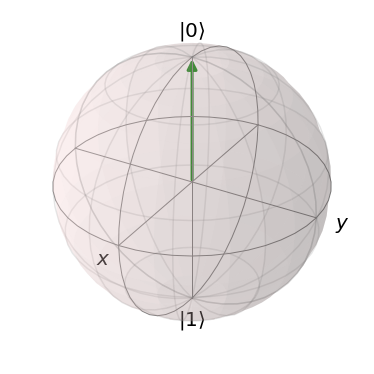

In [27]:
def plotEvolution(result):
    psi_y_negative = psi(np.pi/2,3*np.pi/2)
    b = Bloch()
    b.add_points([expect(sigmax(),result.states),expect(sigmay(),result.states),expect(sigmaz(),result.states)], meth='l')
    b.add_states(result.states[-1])
    b.show()

plotEvolution(result)

Nice, the state vector still in its initial state as we expected. Let's try this on another initial state to make sure it really is doing nothing.

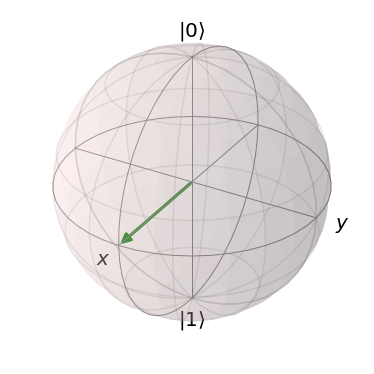

In [28]:
H = qeye(N)
psi_init = psi(np.pi/2,0) # let's pick the psi_x_positive state as the initial state
tlist = np.linspace(0,np.pi,101) # We need to define a list of times that the Shrodinger Equation is solved

result = sesolve(H, psi_init, tlist) # we provide the sesolve() function with the three pieces of information stated above

plotEvolution(result)

Same as above, the the vector is still pointing to where it was initialized. Let's now try some more interesting Hamiltonians. 

Let's begin with $\hat{H}=\hat{\sigma}_x$ and $|\psi(t=0)\rangle = |\uparrow\rangle$.

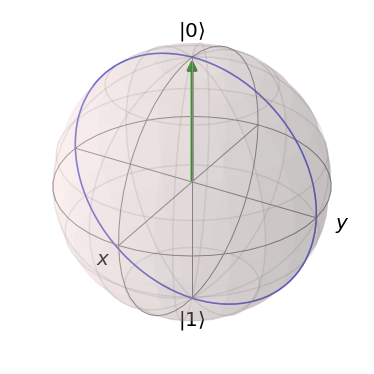

In [29]:
H = sigmax()
psi_init = psi(0,0) # let's pick the psi_x_positive state as the initial state
tlist = np.linspace(0,np.pi,101) # We need to define a list of times that the Shrodinger Equation is solved

result = sesolve(H, psi_init, tlist) # we provide the sesolve() function with the three pieces of information stated above

plotEvolution(result)

This is interesting. We seem to still be in the initial state, but, as indicated by the blue line, the state vector seems to have completed a full rotation about the x-axis after $t=\pi$.

Let's see what happens if we change the initial state to something else. Let's initialize it to point in the positive y-axis.

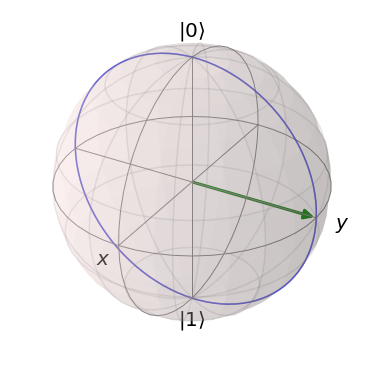

In [30]:
H = sigmax()
psi_init = psi(np.pi/2,np.pi/2) # let's pick the psi_x_positive state as the initial state
tlist = np.linspace(0,np.pi,101) # We need to define a list of times that the Shrodinger Equation is solved

result = sesolve(H, psi_init, tlist) # we provide the sesolve() function with the three pieces of information stated above

plotEvolution(result)

We pretty much get the same result: end up back where we started, but did a full rotation about the x-axis. Let's try one more initial state: pointing along positive the x-axis. 

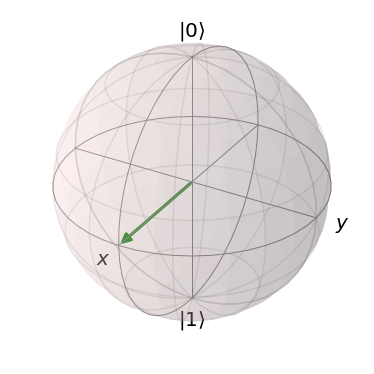

In [31]:
H = sigmax()
psi_init = psi(np.pi/2,0) # let's pick the psi_x_positive state as the initial state
tlist = np.linspace(0,np.pi,101) # We need to define a list of times that the Shrodinger Equation is solved

result = sesolve(H, psi_init, tlist) # we provide the sesolve() function with the three pieces of information stated above

plotEvolution(result)

Nothing seems to have happened. From these three simulations, we can conclude that choosing $\hat{H}=\hat{\sigma}_x$ makes any state vector rotate about the x-axis. If the initial state is already pointing along this axis, then clearly nothing should happen. 

$\textbf{Exercise:}$ Consider what happens if we let the vector rotate for a time less than $\pi$. Find the time for which the state $|\psi\rangle = |\uparrow\rangle$ is rotated to point along the positive y-axis. Does the vector rotate clockwise or counter-clockwise?

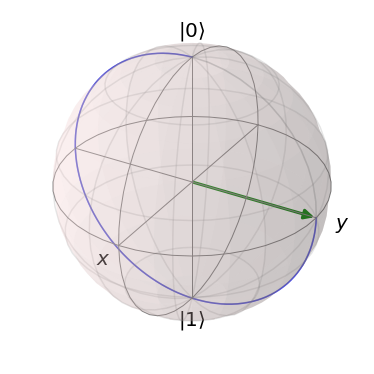

In [32]:
H = sigmax()
psi_init = # fill in using function psi(theta,phi)
tlist = # fill in

result = sesolve(H, psi_init, tlist) # we provide the sesolve() function with the three pieces of information stated above

plotEvolution(result)

From these simulations, one might infer that the Hamiltonian $\hat{H}=\hat{\sigma}_x$, the state vector is rotated about the x-axis by an angle $2t$. Let's see if this generalization for the other Pauli operators as well.

$\textbf{Exercise:}$ Run the the same simulations as above, but for all combinations of $\hat{H}=\hat{\sigma}_i$ for $i\in{x,y,z}$ and $|\psi(t=0)\rangle$ pointing along the positive x, y, and z axes up to a time $t=\pi/4$. Take a minute to think about what is going on, and whether it makes sense before moving onto the next combination.

$\hat{H}=\hat{\sigma}_x$, $|\psi(t=0)\rangle=$ postive x:

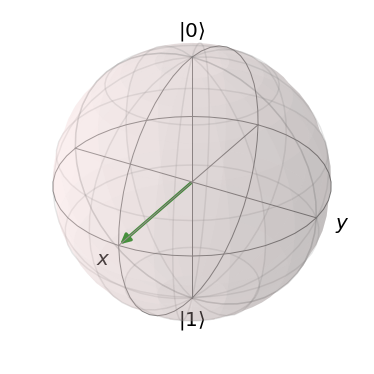

In [33]:
H =  # fill in
psi_init = # fill in using function psi(theta,phi)
tlist =  # fill in
result = sesolve(H, psi_init, tlist) # we provide the sesolve() function with the three pieces of information stated above
plotEvolution(result)

$\hat{H}=\hat{\sigma}_x$, $|\psi(t=0)\rangle=$ postive y:

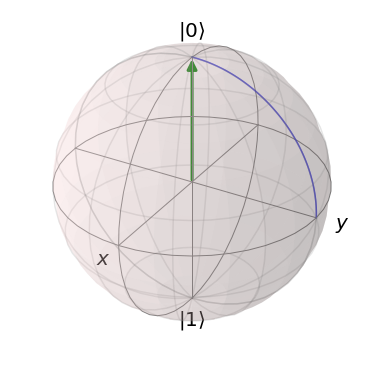

In [34]:
H = # fill in
psi_init = # fill in using function psi(theta,phi)
tlist = # fill in
result = sesolve(H, psi_init, tlist) # we provide the sesolve() function with the three pieces of information stated above
plotEvolution(result)

$\hat{H}=\hat{\sigma}_x$, $|\psi(t=0)\rangle=$ postive z:

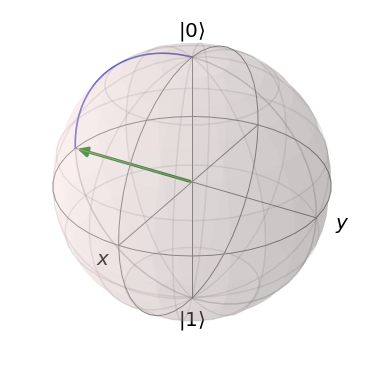

In [35]:
H = # fill in
psi_init = # fill in using function psi(theta,phi)
tlist = # fill in
result = sesolve(H, psi_init, tlist) # we provide the sesolve() function with the three pieces of information stated above
plotEvolution(result)

$\hat{H}=\hat{\sigma}_y$, $|\psi(t=0)\rangle=$ postive x:

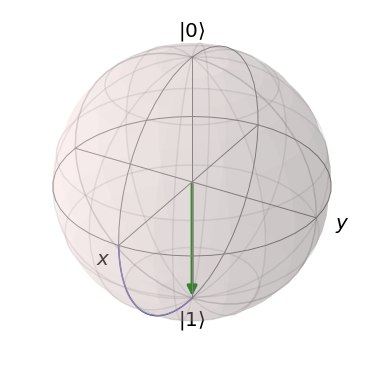

In [36]:
H = # fill in
psi_init = # fill in using function psi(theta,phi)
tlist = # fill in
result = sesolve(H, psi_init, tlist) # we provide the sesolve() function with the three pieces of information stated above
plotEvolution(result)

$\hat{H}=\hat{\sigma}_y$, $|\psi(t=0)\rangle=$ postive y:

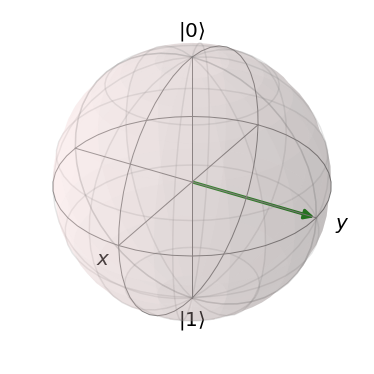

In [37]:
H = # fill in
psi_init = # fill in using function psi(theta,phi)
tlist = # fill in
result = sesolve(H, psi_init, tlist) # we provide the sesolve() function with the three pieces of information stated above
plotEvolution(result)

$\hat{H}=\hat{\sigma}_y$, $|\psi(t=0)\rangle=$ postive z:

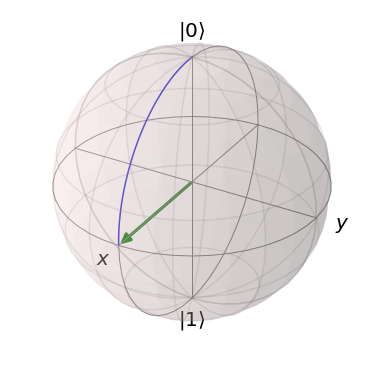

In [38]:
H = # fill in
psi_init = # fill in using function psi(theta,phi)
tlist = # fill in
result = sesolve(H, psi_init, tlist) # we provide the sesolve() function with the three pieces of information stated above
plotEvolution(result)

$\hat{H}=\hat{\sigma}_z$, $|\psi(t=0)\rangle=$ postive x:

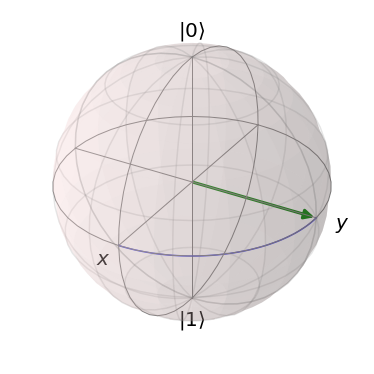

In [39]:
H = # fill in
psi_init = # fill in using function psi(theta,phi)
tlist = # fill in
result = sesolve(H, psi_init, tlist) # we provide the sesolve() function with the three pieces of information stated above
plotEvolution(result)

$\hat{H}=\hat{\sigma}_z$, $|\psi(t=0)\rangle=$ postive y:

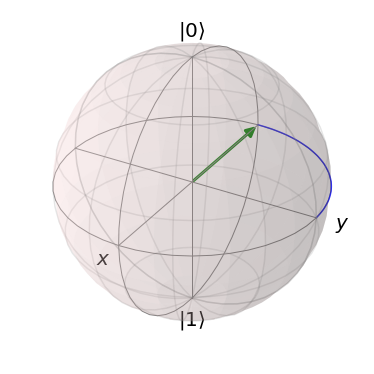

In [40]:
H = # fill in
psi_init = # fill in using function psi(theta,phi)
tlist = # fill in
result = sesolve(H, psi_init, tlist) # we provide the sesolve() function with the three pieces of information stated above
plotEvolution(result)

$\hat{H}=\hat{\sigma}_z$, $|\psi(t=0)\rangle=$ postive z:

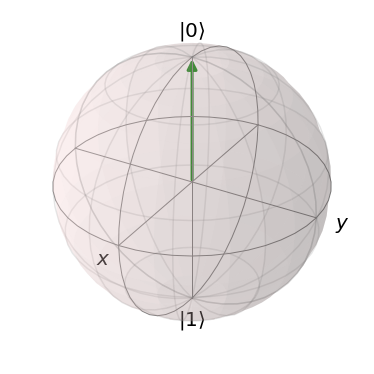

In [41]:
H = # fill in
psi_init = # fill in using function psi(theta,phi)
tlist = # fill in
result = sesolve(H, psi_init, tlist) # we provide the sesolve() function with the three pieces of information stated above
plotEvolution(result)

Great! After all that, it seems that depedning on which Pauli operator we choose, we rotate the initial state vector about that axis by an angle $2t$. But this brings up another question: can we only rotate state vectors about the x, y, or z axes? Or is there a way to generalize this such that the vector can rotate about any arbitrary axis? 

Much like how we came up with a way to represent states that can point in any arbitrary direction on the Bloch sphere, we can come up with a Hamiltonian that rotates these states about an arbitrary axis. It turns out that this Hamiltonian also parameterized by the same two angle $\theta$ and $\phi$:

$\hat{H}(\theta,\phi) = sin(\theta)cos(\phi)\hat{\sigma}_x + sin(\theta)sin(\phi)\hat{\sigma}_y + cos(\theta)\hat{\sigma}_z$

This Hamiltonian will rotate any initial state about the axis that points in the direction of the state vector $|\psi(\theta,\phi)\rangle$. 

$\textbf{Exercise:}$ Complete the function that generates the parameterized Hamiltonian given above:

In [42]:
def Hamiltonian(theta,phi):
    return # fill in using sigmax(), sigmay(), and sigmaz()

$\textbf{Exercise:}$ Find the values of $\theta$ and $\phi$ such that $\hat{H}(\theta,\phi) = \hat{\sigma}_x$, $\hat{H}(\theta,\phi) = \hat{\sigma}_y$, and $\hat{H}(\theta,\phi) = \hat{\sigma}_z$. Once you find those values, plot the state $|\psi(\theta,\phi)\rangle$ on the Bloch sphere. What do you notice?

True
True
True


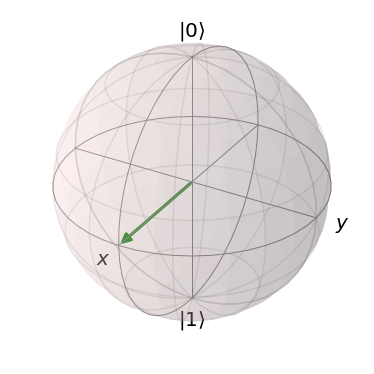

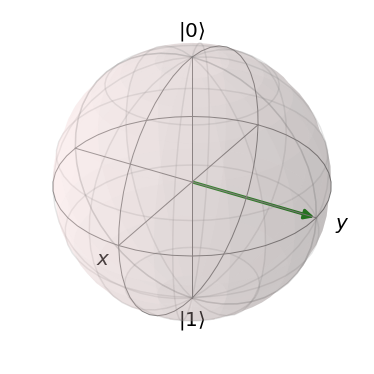

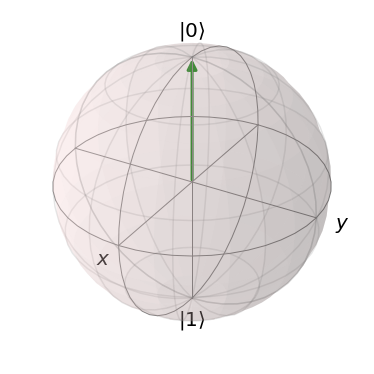

In [43]:
print(Hamiltonian(theta, phi) == sigmax()) # replace theta and phi with the values that print true
print(Hamiltonian(theta, phi) == sigmay()) # replace theta and phi with the values that print true
print(Hamiltonian(theta, phi) == sigmaz()) # replace theta and phi with the values that print true

# plot the three state for the values of theta, phi you found above:

# fill in





Now, let's see if this Hamiltonian really does what I claimed it would do. Let's try an example with $\theta=\pi/4$ and $\phi=0$, with the initial state $|\psi\rangle = |\uparrow\rangle$:

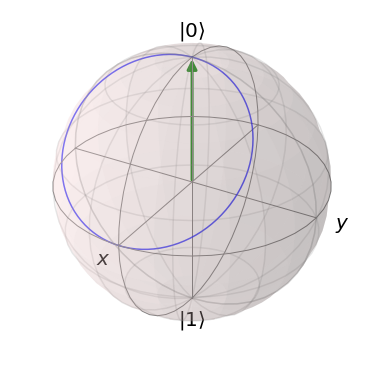

In [44]:
H = Hamiltonian(np.pi/4,0)
psi_init = psi(0,0) # let's pick the psi__positive state as the initial state
tlist = np.linspace(0,np.pi,101) # We need to define a list of times that the Shrodinger Equation is solved
result = sesolve(H, psi_init, tlist) # we provide the sesolve() function with the three pieces of information stated above
plotEvolution(result)

It seems that that the vector has rotated about the axis formed at a 45-degree angle on the xz-plane. Let's see if this axis is indeed in the direction of $|\psi(\theta,\phi)\rangle$

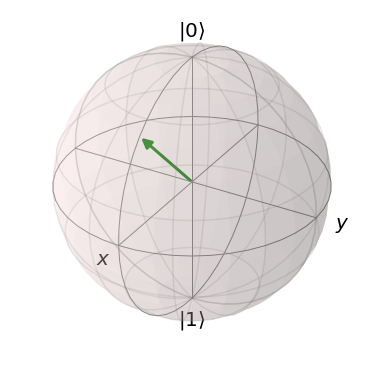

In [45]:
p = psi(np.pi/4,0)
b = Bloch()
b.add_states(p)
b.show()

Sure seems like it! This completes the generalization. We now know how to rotate an arbitrary state vector $|\psi(\theta,\phi)\rangle$ about an arbitrary axis $\hat{H}(\theta',\phi')$.

For those of you wondering why went through the effort of doing all of this: in the coming lectures, you will learn that quantum gates are all a type of rotation operation. That is, the gate is defined by rotating the state of a qubit about some given axis and by some given angle.  

$\textbf{One final exercise:}$ Perform the same rotation operation as above, but this time with the initial state $|\psi\rangle = |\downarrow\rangle$



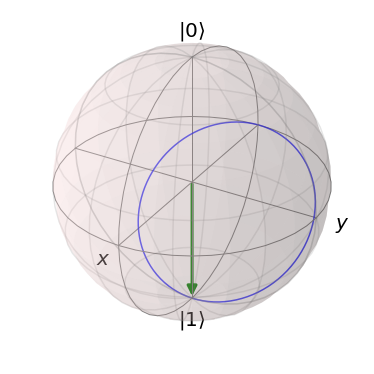

In [46]:
H = # fill in using Hamiltonian(theta,phi)
psi_init = # fill in using psi(theta,phi)
tlist = # fill in
result = sesolve(H, psi_init, tlist) # we provide the sesolve() function with the three pieces of information stated above
plotEvolution(result)

It may look a bit funky since we are plotting a 3D object on a 2D screen, but you should see the vector rotate about that same axis, but in the bottom hemisphere.